In [2]:
import numpy as np
import pandas as pd
from pandas.plotting import parallel_coordinates

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn import metrics

# To plot the graphs in the notebook
%matplotlib inline

In [3]:
# Importing the dataset
dataset = pd.read_csv('brain_stroke.csv')
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [4]:
# Checking for missing values
dataset.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [5]:
# Checking for duplicate values
dataset.duplicated().sum()

0

In [6]:
# replace the target values with  Yes/No
dataset['stroke'] = dataset['stroke'].replace({1:'Yes', 0:'No'})

# replace the gender values with 0/1
dataset['gender'] = dataset['gender'].replace({'Male': 0, 'Female': 1})

# replace the ever_married values with 0/1
dataset['ever_married'] = dataset['ever_married'].replace({'No': 0, 'Yes': 1})

# replace the work_type values with 0/1/2/3/4
dataset['work_type'] = dataset['work_type'].replace({'children': 0, 'Govt_job': 1, 'Never_worked': 2, 'Private': 3, 'Self-employed': 4})

# replace the Residence_type values with 0/1
dataset['Residence_type'] = dataset['Residence_type'].replace({'Rural': 0, 'Urban': 1})

# replace the smoking_status values with 0/1/2/3
dataset['smoking_status'] = dataset['smoking_status'].replace({'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3})

# replace the age values with 0/1/2/3
for row in dataset.index:
    if dataset.loc[row, 'age'] < 26:
        dataset.loc[row, 'age'] = 0
    elif dataset.loc[row, 'age'] < 46:
        dataset.loc[row, 'age'] = 1
    elif dataset.loc[row, 'age'] < 62:
        dataset.loc[row, 'age'] = 2
    elif dataset.loc[row, 'age'] < 83:
        dataset.loc[row, 'age'] = 3
    else:
        dataset.loc[row, 'age'] = 4

# replace the avg_glucose_level values with 0/1/2/3
for row in dataset.index:
    if dataset.loc[row, 'avg_glucose_level'] < 100:
        dataset.loc[row, 'avg_glucose_level'] = 0
    elif dataset.loc[row, 'avg_glucose_level'] < 125:
        dataset.loc[row, 'avg_glucose_level'] = 1
    elif dataset.loc[row, 'avg_glucose_level'] < 150:
        dataset.loc[row, 'avg_glucose_level'] = 2
    elif dataset.loc[row, 'avg_glucose_level'] < 175:
        dataset.loc[row, 'avg_glucose_level'] = 3
    else:
        dataset.loc[row, 'avg_glucose_level'] = 4

# replace the bmi values with 0/1/2/3
for row in dataset.index:
    if dataset.loc[row, 'bmi'] < 18.5:
        dataset.loc[row, 'bmi'] = 0
    elif dataset.loc[row, 'bmi'] < 25:
        dataset.loc[row, 'bmi'] = 1
    elif dataset.loc[row, 'bmi'] < 30:
        dataset.loc[row, 'bmi'] = 2
    elif dataset.loc[row, 'bmi'] < 35:
        dataset.loc[row, 'bmi'] = 3
    else:
        dataset.loc[row, 'bmi'] = 4

dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,3.0,0,1,1,3,1,4.0,4.0,0,Yes
1,0,3.0,0,1,1,3,0,1.0,3.0,1,Yes
2,1,2.0,0,0,1,3,1,3.0,3.0,2,Yes
3,1,3.0,1,0,1,4,0,3.0,1.0,1,Yes
4,0,3.0,0,0,1,3,1,4.0,2.0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
4976,0,1.0,0,0,0,3,0,0.0,2.0,0,No
4977,0,1.0,0,0,1,3,1,4.0,3.0,2,No
4978,1,1.0,1,0,1,1,0,0.0,3.0,2,No
4979,0,1.0,0,0,1,3,0,0.0,3.0,2,No


In [7]:
# Return numerical summary of each attribute of iris
dataset.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,0.583618,1.484441,0.096165,0.055210,0.658502,2.497490,0.508332,0.836378,2.174262,1.584019
std,0.493008,1.113990,0.294848,0.228412,0.474260,1.281567,0.499981,1.336516,1.167390,1.092516
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,0.000000,2.000000,1.000000
75%,1.000000,2.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,3.000000,3.000000
max,1.000000,3.000000,1.000000,1.000000,1.000000,4.000000,1.000000,4.000000,4.000000,3.000000


In [8]:
# Return the number of unique values in each column
dataset.nunique()

gender               2
age                  4
hypertension         2
heart_disease        2
ever_married         2
work_type            4
Residence_type       2
avg_glucose_level    5
bmi                  5
smoking_status       4
stroke               2
dtype: int64

In [9]:
# let's check number of samples for each class of target variable
dataset['stroke'].value_counts()

No     4733
Yes     248
Name: stroke, dtype: int64

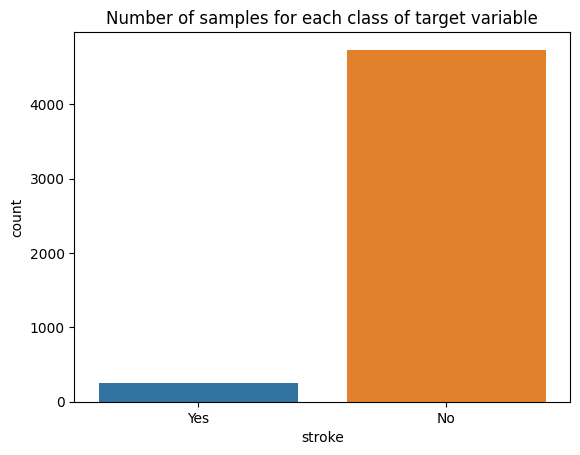

In [10]:
# let's visualise the number of samples for each class with count plot
sns.countplot(x='stroke', data=dataset) 
plt.title("Number of samples for each class of target variable");

C:\Users\mahdi\AppData\Local\Temp\ipykernel_28444\4019732388.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr().round(2)


<AxesSubplot: >

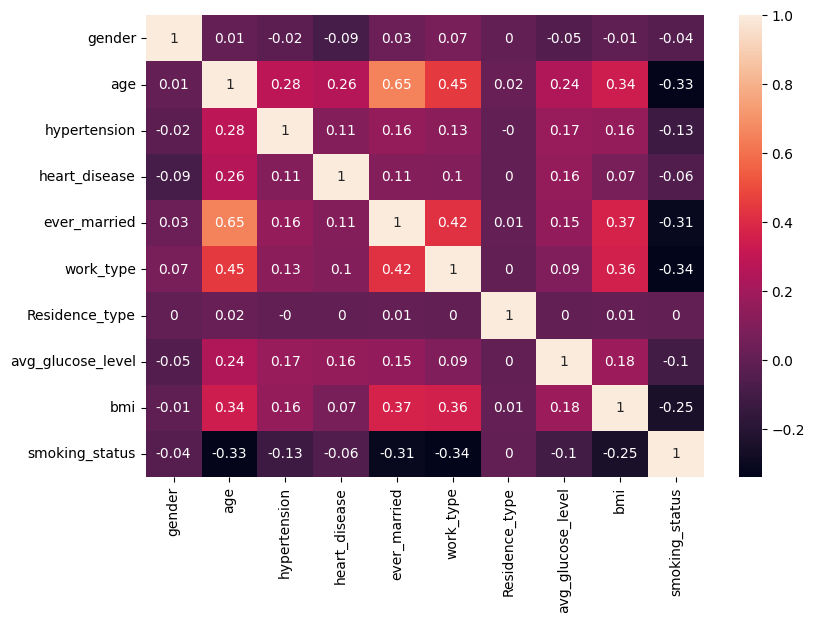

In [11]:
# corr() to calculate the correlation between variables
correlation_matrix = dataset.corr().round(2)

# changing the figure size
plt.figure(figsize=(9,6))

# "annot = True" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

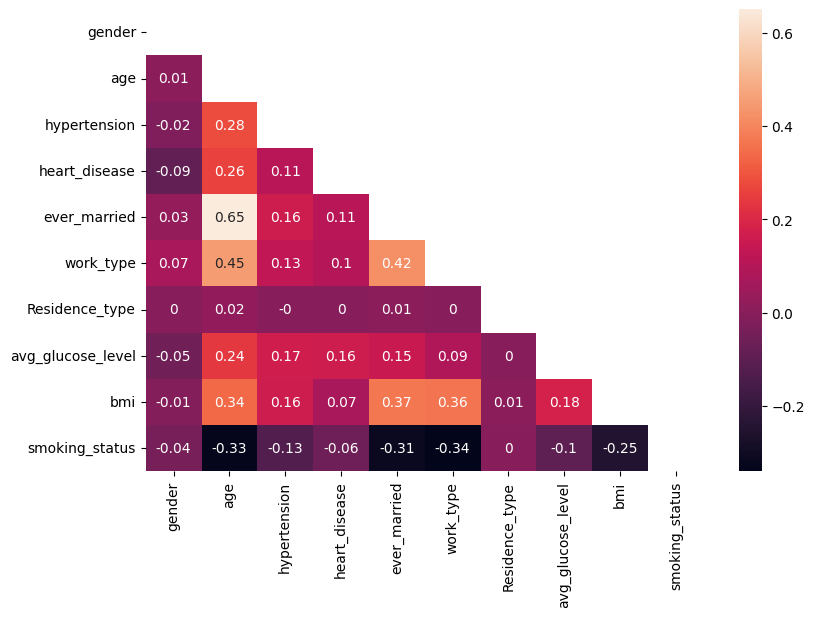

In [12]:
# Steps to remove redundant values

# Return a array filled with zeros
mask = np.zeros_like(correlation_matrix)
# Return the indices for the upper-triangle of array
mask[np.triu_indices_from(mask)] = True

# changing the figure size
plt.figure(figsize=(9,6))

# "annot = True" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, mask=mask);

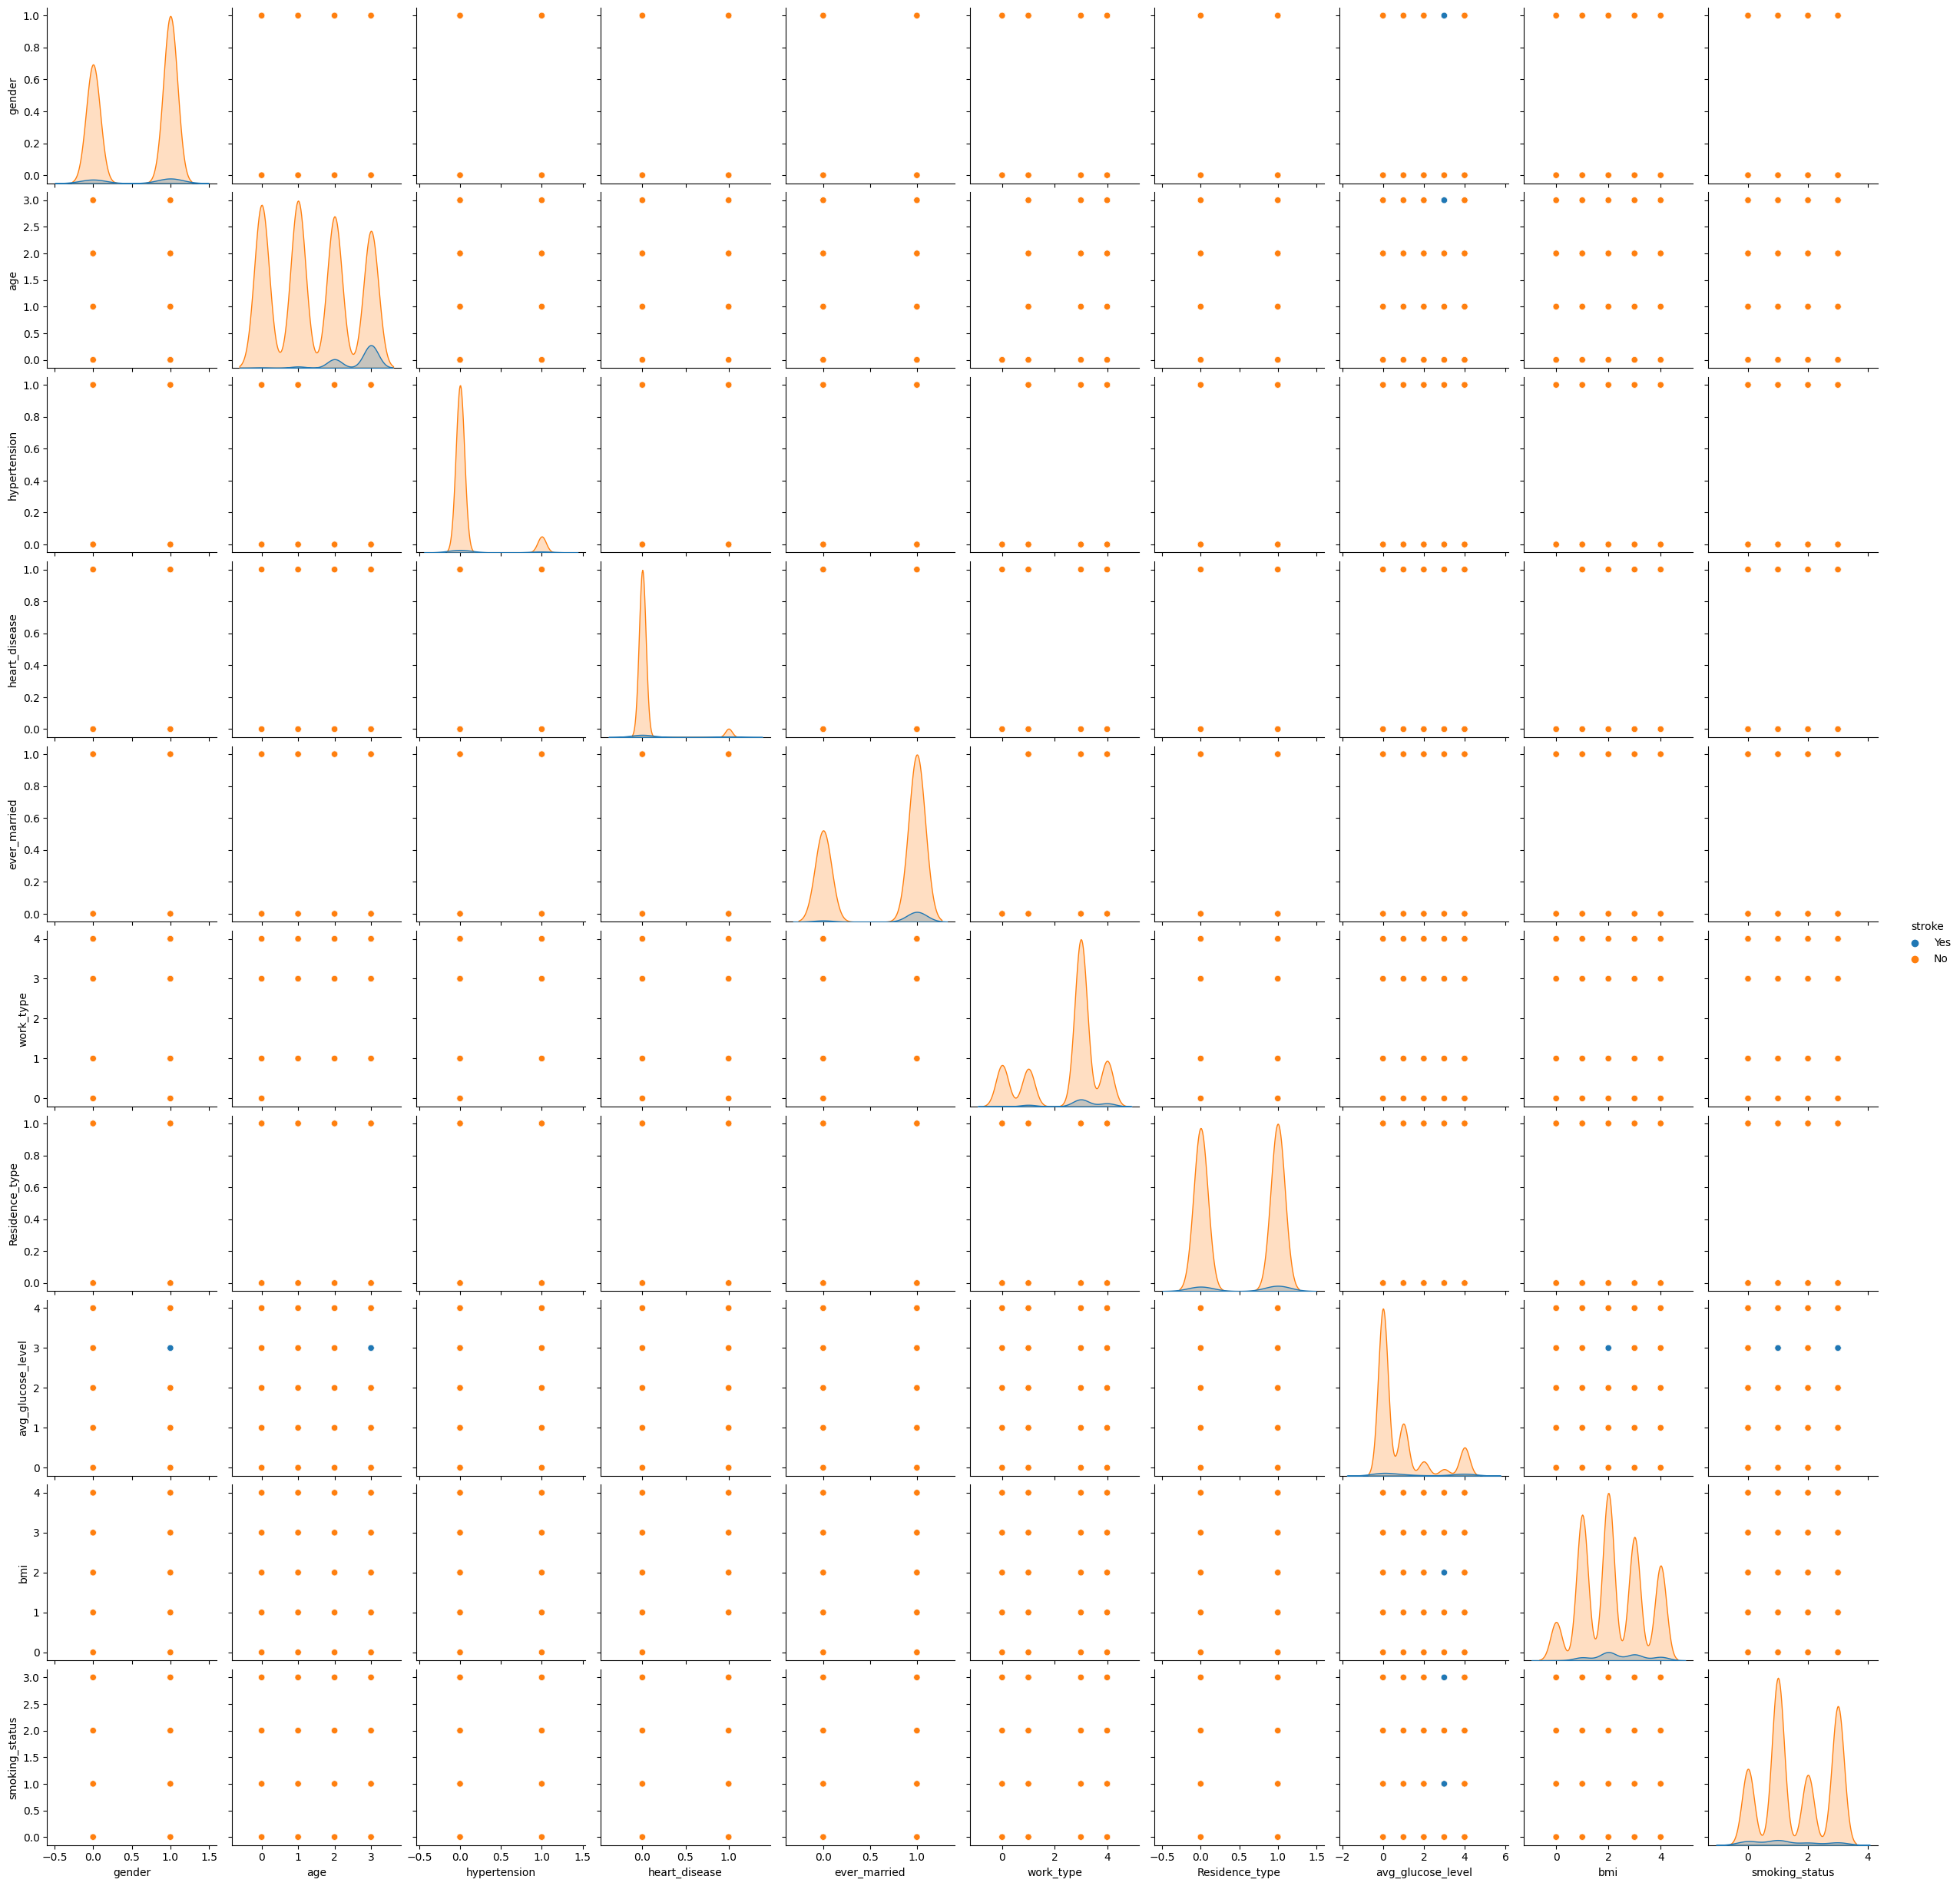

In [13]:
# let's create pairplot to visualise the data for each pair of attributes
sns.pairplot(dataset, hue='stroke');

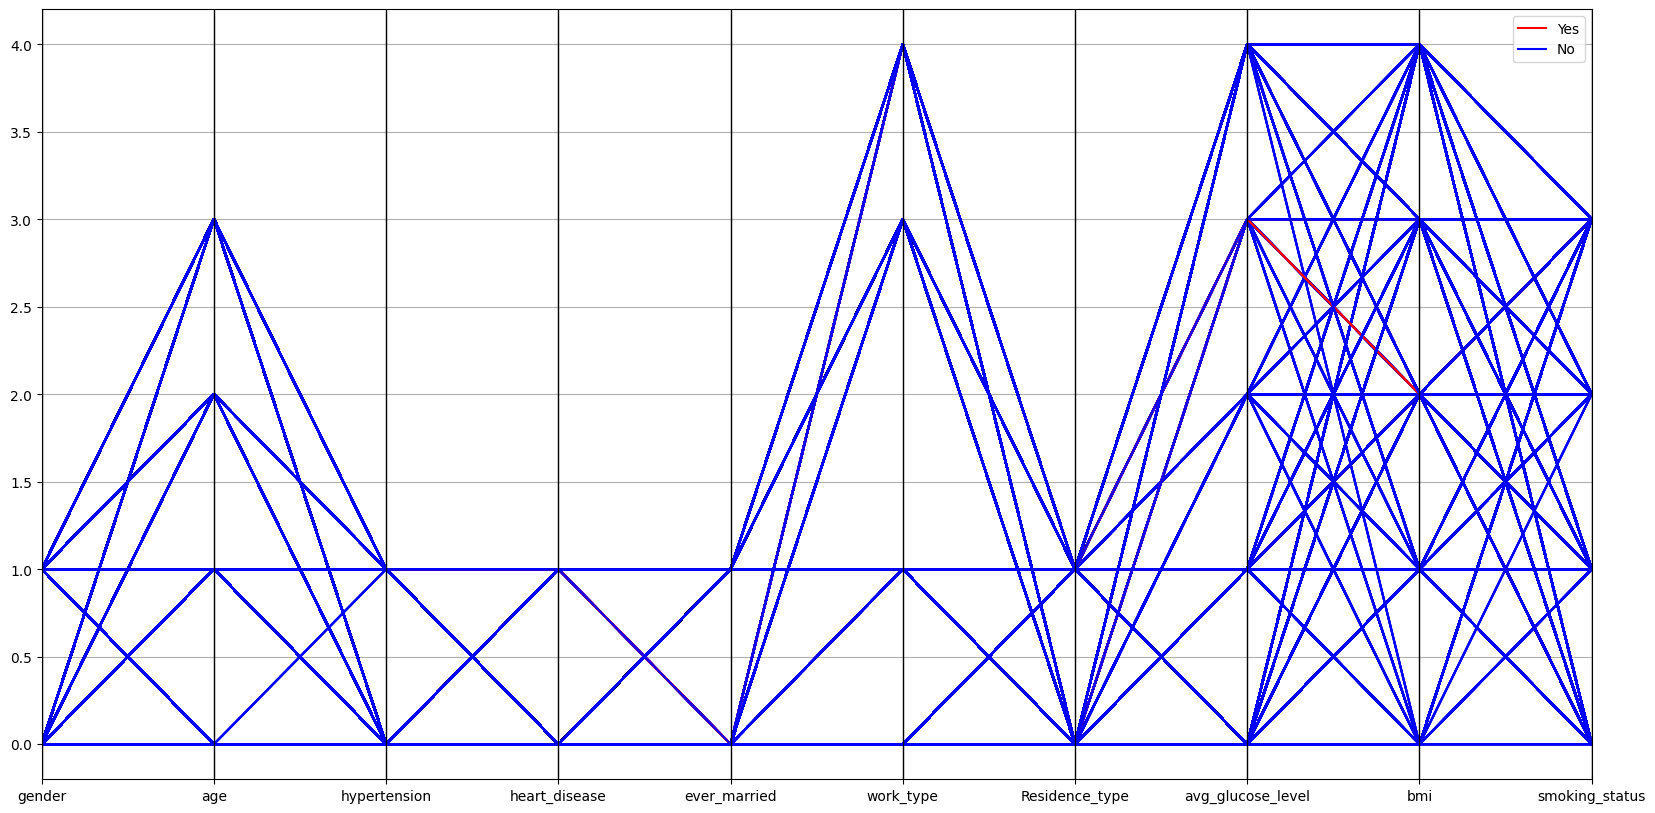

In [15]:
# parallel_coordinates to visualise the data for each pair of attributes
figura = plt.figure(figsize=(20,10))
parallel_coordinates(dataset, 'stroke', color=('red', 'blue'));

In [17]:
# Feature matrix
X = dataset[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']]
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,3.0,0,1,1,3,1,4.0,4.0,0
1,0,3.0,0,1,1,3,0,1.0,3.0,1
2,1,2.0,0,0,1,3,1,3.0,3.0,2
3,1,3.0,1,0,1,4,0,3.0,1.0,1
4,0,3.0,0,0,1,3,1,4.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...
4976,0,1.0,0,0,0,3,0,0.0,2.0,0
4977,0,1.0,0,0,1,3,1,4.0,3.0,2
4978,1,1.0,1,0,1,1,0,0.0,3.0,2
4979,0,1.0,0,0,1,3,0,0.0,3.0,2


In [18]:
# Target vector
y = dataset['stroke']
y

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
4976     No
4977     No
4978     No
4979     No
4980     No
Name: stroke, Length: 4981, dtype: object

In [19]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (3984, 10)
X_test shape:  (997, 10)
y_train shape:  (3984,)
y_test shape:  (997,)


In [20]:
# Create Model: Support Vector Machine (SVM)
from sklearn import svm

# Create a svm Classifier
model_svm = svm.SVC()

# Train the model using the training sets
model_svm.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_svm = model_svm.predict(X_test)

# checking the accuracy of the algorithm by comparing predicted output by the model and the actual output
score_svm = metrics.accuracy_score(y_pred_svm, y_test).round(4)

print("----------------------------------")
print("Accuracy of Support Vector Machine: ", score_svm)
print("----------------------------------")

# save the accuracy score of the model
model_accuracy = pd.DataFrame({'Model': ['Support Vector Machine'], 'Accuracy': [score_svm]})
model_accuracy

----------------------------------
Accuracy of Support Vector Machine:  0.9498
----------------------------------


,Model,Accuracy
0,Support Vector Machine,0.9498


In [21]:
# Create Model: Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
model_dt = DecisionTreeClassifier(random_state=4)

# Train the model using the training sets
model_dt.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_dt = model_dt.predict(X_test)

# checking the accuracy of the algorithm by comparing predicted output by the model and the actual output
score_dt = metrics.accuracy_score(y_pred_dt, y_test).round(4)

print("----------------------------------")
print("Accuracy of Decision Tree: ", score_dt)
print("----------------------------------")

# save the accuracy score of the model
model_accuracy = model_accuracy.append({'Model': 'Decision Tree', 'Accuracy': score_dt}, ignore_index=True)
model_accuracy

----------------------------------
Accuracy of Decision Tree:  0.9147
----------------------------------


C:\Users\mahdi\AppData\Local\Temp\ipykernel_28444\3990903316.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_accuracy = model_accuracy.append({'Model': 'Decision Tree', 'Accuracy': score_dt}, ignore_index=True)


,Model,Accuracy
0,Support Vector Machine,0.9498
1,Decision Tree,0.9147


In [39]:
# Create Model: K Nearest Neighbours (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN Classifier
model_knn = KNeighborsClassifier(n_neighbors=6)

# Train the model using the training sets
model_knn.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_knn = model_knn.predict(X_test)

# checking the accuracy of the algorithm by comparing predicted output by the model and the actual output
score_knn = metrics.accuracy_score(y_pred_knn, y_test).round(4)

print("----------------------------------")
print("Accuracy of K Nearest Neighbours: ", score_knn)
print("----------------------------------")

# save the accuracy score of the model
model_accuracy = model_accuracy.append({'Model': 'K Nearest Neighbours', 'Accuracy': score_knn}, ignore_index=True)
model_accuracy

----------------------------------
Accuracy of K Nearest Neighbours:  0.9498
----------------------------------


C:\Users\mahdi\AppData\Local\Temp\ipykernel_28444\787870057.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_accuracy = model_accuracy.append({'Model': 'K Nearest Neighbours', 'Accuracy': score_knn}, ignore_index=True)


,Model,Accuracy
0,Support Vector Machine,0.9498
1,Decision Tree,0.9147
2,K Nearest Neighbours,0.9498


In [40]:
# Create Model: Logistic Regression
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression Classifier
model_lr = LogisticRegression()

# Train the model using the training sets
model_lr.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_lr = model_lr.predict(X_test)

# checking the accuracy of the algorithm by comparing predicted output by the model and the actual output
score_lr = metrics.accuracy_score(y_pred_lr, y_test).round(4)

print("----------------------------------")
print("Accuracy of Logistic Regression: ", score_lr)
print("----------------------------------")

# save the accuracy score of the model
model_accuracy = model_accuracy.append({'Model': 'Logistic Regression', 'Accuracy': score_lr}, ignore_index=True)
model_accuracy

----------------------------------
Accuracy of Logistic Regression:  0.9498
----------------------------------


C:\Users\mahdi\AppData\Local\Temp\ipykernel_28444\2435363254.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_accuracy = model_accuracy.append({'Model': 'Logistic Regression', 'Accuracy': score_lr}, ignore_index=True)


,Model,Accuracy
0,Support Vector Machine,0.9498
1,Decision Tree,0.9147
2,K Nearest Neighbours,0.9498
3,Logistic Regression,0.9498


In [41]:
# Create Model: Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes Classifier
model_nb = GaussianNB()

# Train the model using the training sets
model_nb.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_nb = model_nb.predict(X_test)

# checking the accuracy of the algorithm by comparing predicted output by the model and the actual output
score_nb = metrics.accuracy_score(y_pred_nb, y_test).round(4)

print("----------------------------------")
print("Accuracy of Naive Bayes: ", score_nb)

# save the accuracy score of the model
model_accuracy = model_accuracy.append({'Model': 'Naive Bayes', 'Accuracy': score_nb}, ignore_index=True)
model_accuracy

----------------------------------
Accuracy of Naive Bayes:  0.8686


C:\Users\mahdi\AppData\Local\Temp\ipykernel_28444\145792961.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_accuracy = model_accuracy.append({'Model': 'Naive Bayes', 'Accuracy': score_nb}, ignore_index=True)


,Model,Accuracy
0,Support Vector Machine,0.9498
1,Decision Tree,0.9147
2,K Nearest Neighbours,0.9498
3,Logistic Regression,0.9498
4,Naive Bayes,0.8686


                    Model  Accuracy
0  Support Vector Machine    0.9498
1           Decision Tree    0.9147
2    K Nearest Neighbours    0.9498
3     Logistic Regression    0.9498
4             Naive Bayes    0.8686


Text(0, 0.5, 'Model')

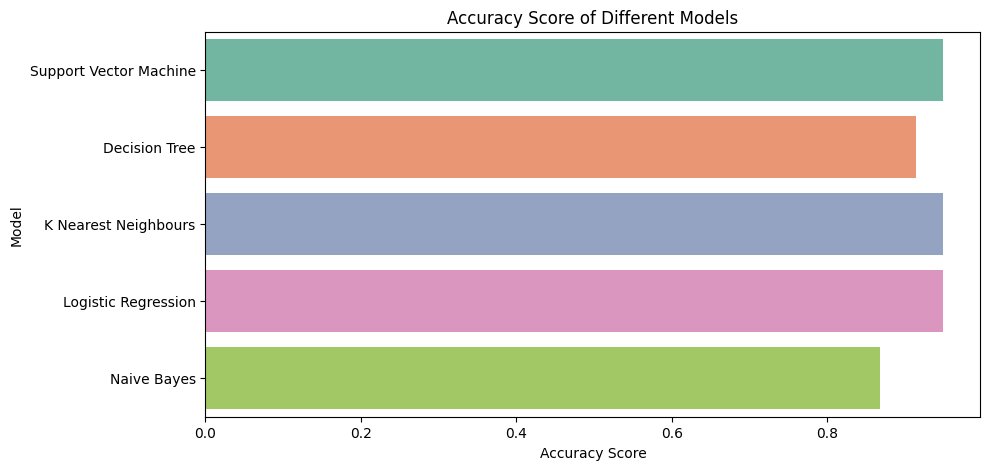

In [49]:
# Compare Accuracy Score of Different Models
print(model_accuracy)
plt.figure(figsize=(10, 5))
sns.barplot(x='Accuracy', y='Model', data=model_accuracy, palette='Set2')
plt.title('Accuracy Score of Different Models')
plt.xlabel('Accuracy Score')
plt.ylabel('Model')